# Sampling the Hypergeometric Distribution

We will use the deck of cards data frame that was [shown in the appendix](https://straightdraw.github.io/probstat/A2c.html).

In [10]:
values <- rep(2:14,4)
suits <- c(rep('S',13), rep('H',13), rep('D',13), rep('C',13))
deck_df <- data.frame(v = values, suits = factor(suits))
head(deck_df,5)

v,suits
2,S
3,S
4,S
5,S
6,S


As was shown at the link above, we can draw a hand and account only for the suits of the cards drawn using the function **sample()**. To illustrate below, we will draw five cards at random from a standard deck of playing cards and store them in the variable *hand*. We will also show how to count the number of spades that are in the hand.

In [2]:
hand <- sample(deck_df$suits, 5)
cat('In this hand, the number of\n   spades = ', sum( hand  == 'S' ))
hand

In this hand, the number of
   spades =  2

[1] S S C D C
Levels: C D H S

## Example: Number of Spades Drawn into a Spades Hand

Spades are the permanent trump suit in the game of Spades. In a game of Spades with four players, each player is dealt a 13-card hand. Let's deal a hand and count the number of spades in it.

In [3]:
hand <- sample(deck_df$suits, 13)
cat('In this hand, the number of\n   spades = ', sum( hand  == 'S' ))

In this hand, the number of
   spades =  3

### The CLT and Law of Large Numbers

Our sample size is fixed at $k=13$ for drawing a spades hand. Thus, the CLT will have no room to improve the estimate. However, using the Law of Large numbers, we can draw thousands (or millions) of hands.

#### Expected Value of the Hypergeometric Distribution

In a collection of $N$ objects $K$ of which are considered successes, the probability of $k$ successful draws out of $n$ total draws is given by hypergeometric distribution, we have the following pdf:

$$P(k) = \frac{\binom{K}{k}\binom{N-K}{n-k}}{\binom{N}{n}}$$

The expected value of this distribution is given by:

$$E(X) = n\frac{K}{N}$$

#### Theoretical Expected Value for our Example

For the card game Spades, $N=52, K=13, n = 13$ and $k$ varies between 0 and 13 inclusive. Thus, for Spades:

$$E(X) = 13\left(\frac{13}{52}\right) = \frac{13}{4} = 3.25$$

This table summarizes the investigation to include five examples from the sampling distribution of Drawing a Spades hand:

<table class="center" style="width:70%; text-align:center;">
  <tr>
    <th>Hands Drawn</th>
    <th>N</th> 
    <th>K</th>
    <th>E(X)</th>
    <th>Simulation Grand Mean</th>
  </tr>
  <tr>
    <td>1,000</td>
    <td>52</td>
    <td>13</td>
    <td>3.25</td>
    <td></td>
  </tr>
  <tr>
    <td>2,000</td>
    <td>52</td>
    <td>13</td>
    <td>3.25</td>
    <td>3.2325</td>
  </tr>
  <tr>
    <td>5,000</td>
    <td>52</td>
    <td>13</td>
    <td>3.25</td>
    <td>3.2394</td>
  </tr>
  <tr>
    <td>10,000</td>
    <td>52</td>
    <td>13</td>
    <td>3.25</td>
    <td>3.2527</td>
  </tr>
  <tr>
    <td>50,000</td>
    <td>52</td>
    <td>13</td>
    <td>3.25</td>
    <td>3.24732</td>
  </tr>
    <td>100,000</td>
    <td>52</td>
    <td>13</td>
    <td>3.25</td>
    <td>3.23414</td>
</table>
  </tr>
</table>

### Distribution for Number of Spades in a Hand

Using the **for loop** created the previous section of these notes, we can copy-paste and tweak as needed.

The grand mean of the simulated distribution is equal to
    3.24

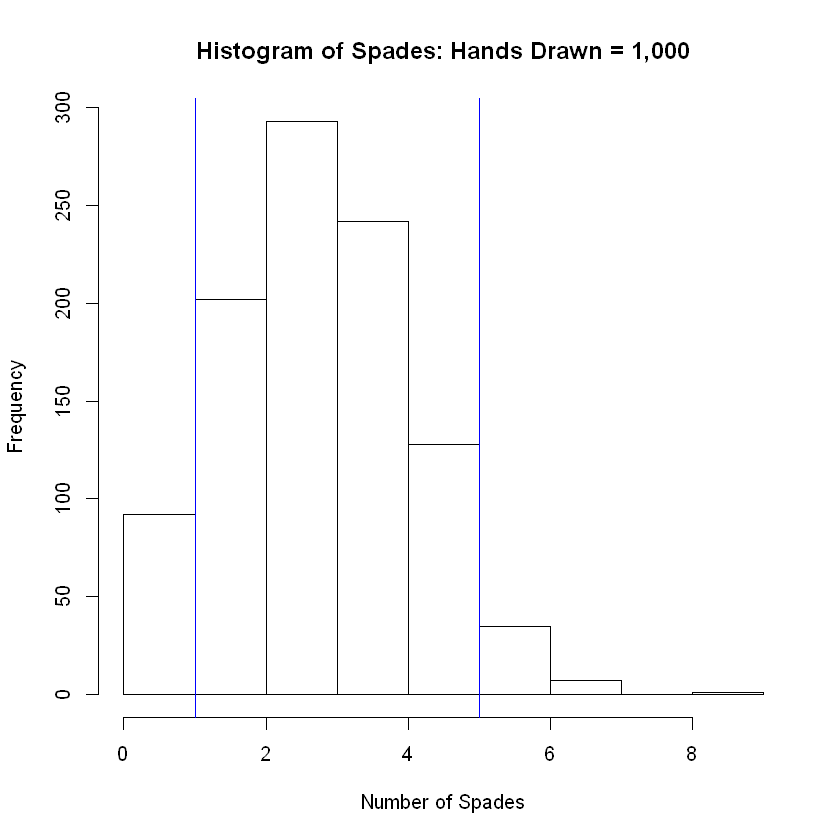

In [4]:
num_success <- c()     # create a vector to store the number of successes for each sample drawn
num_samps = 1000       # set the number of samples to be drawn

for (i in 1:num_samps){
    hand <- sample(deck_df$suits, 13)     # draw 13 cards, count number of Spades
    num_success[i] <- sum( hand  == 'S' )     # count and store the number of Spades from this trial
}

lower <- quantile(num_success, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_success, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the simulated distribution is equal to\n   ',mean(num_success) )
hist(num_success, breaks = 8, main = 'Histogram of Spades: Hands Drawn = 1,000', xlab = 'Number of Spades')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 

### Collecting the Results

I will create a table here that gathers the results from sampling distribution with sample size 13 (fixed by problem scenario) and with increasing number of samples drawn.

<table class="center" style="width:65%; text-align:center;">
  <tr>
    <th>Hands Drawn</th>
    <th>E(X)</th>
    <th>Simulation Grand Mean</th>
  </tr>
  <tr>
    <td>1,000</td>
    <td>3.25</td>
    <td>3.252</td>
  </tr>
  <tr>
    <td>2,000</td>
    <td>3.25</td>
    <td>3.2325</td>
  </tr>
  <tr>
    <td>5,000</td>
    <td>3.25</td>
    <td>3.2394</td>
  </tr>
  <tr>
    <td>10,000</td>
    <td>3.25</td>
    <td>3.2527</td>
  </tr>
  <tr>
    <td>50,000</td>
    <td>3.25</td>
    <td>3.24732</td>
  </tr>
    <td>100,000</td>
    <td>3.25</td>
    <td>3.23414</td>
</table>

The grand mean of the simulated distribution is equal to
    3.2025

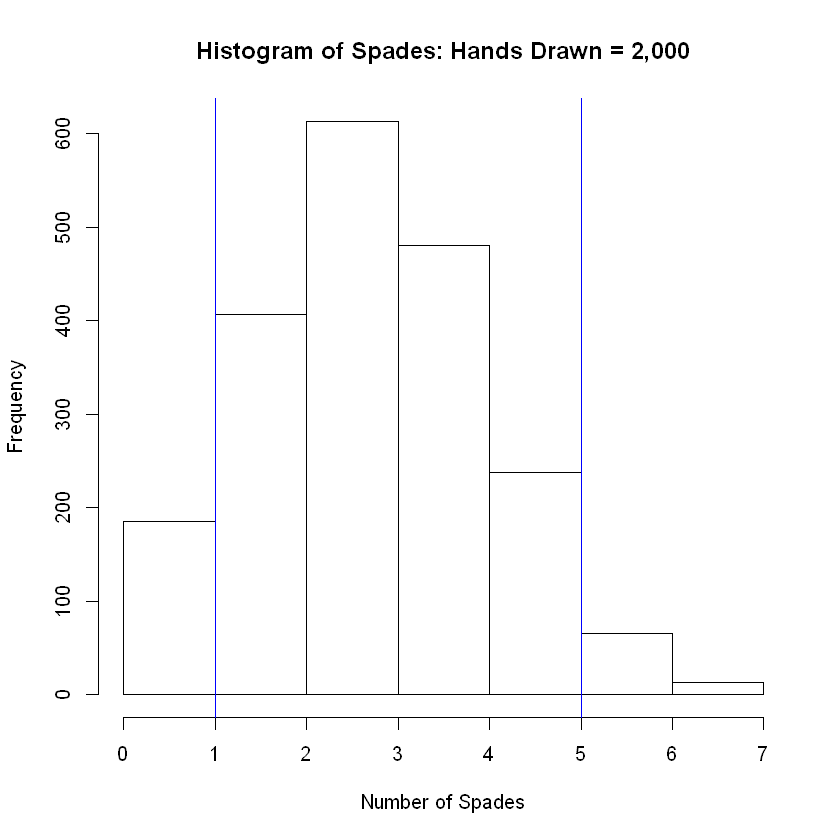

In [5]:
num_success <- c()     # create a vector to store the number of successes for each sample drawn
num_samps = 2000       # set the number of samples to be drawn

for (i in 1:num_samps){
    hand <- sample(deck_df$suits, 13)     # draw 13 cards, count number of Spades
    num_success[i] <- sum( hand  == 'S' )     # count and store the number of Spades from this trial
}

lower <- quantile(num_success, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_success, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the simulated distribution is equal to\n   ',mean(num_success) )
hist(num_success, breaks = 8, main = 'Histogram of Spades: Hands Drawn = 2,000', xlab = 'Number of Spades')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 

The grand mean of the simulated distribution is equal to
    3.2492

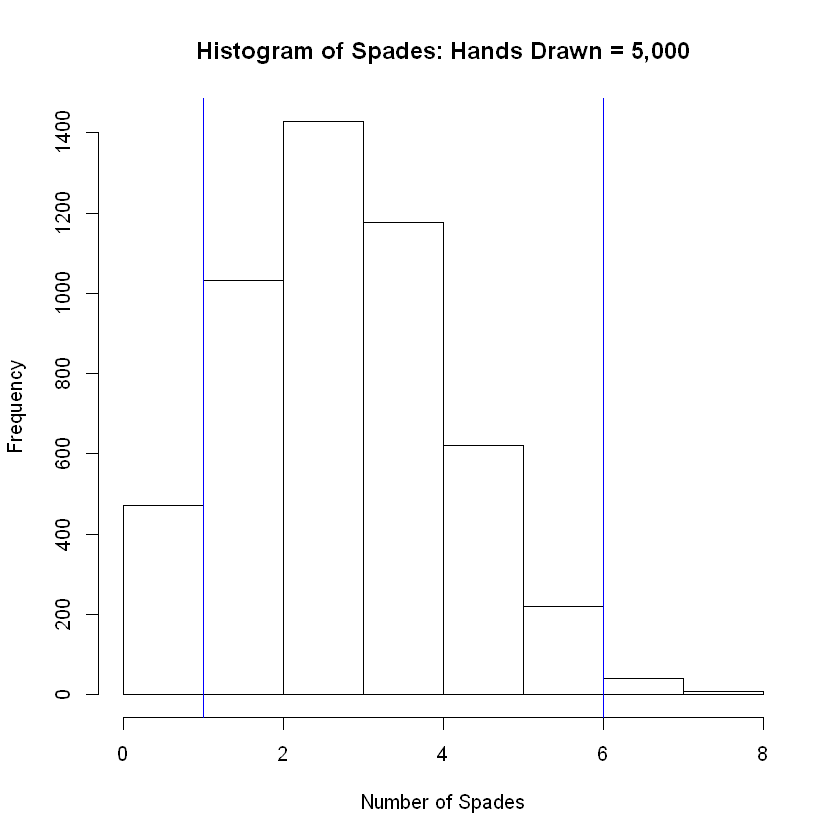

In [6]:
num_success <- c()     # create a vector to store the number of successes for each sample drawn
num_samps = 5000       # set the number of samples to be drawn

for (i in 1:num_samps){
    hand <- sample(deck_df$suits, 13)     # draw 13 cards, count number of Spades
    num_success[i] <- sum( hand  == 'S' )     # count and store the number of Spades from this trial
}

lower <- quantile(num_success, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_success, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the simulated distribution is equal to\n   ',mean(num_success) )
hist(num_success, breaks = 8, main = 'Histogram of Spades: Hands Drawn = 5,000', xlab = 'Number of Spades')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 

The grand mean of the simulated distribution is equal to
    3.2474

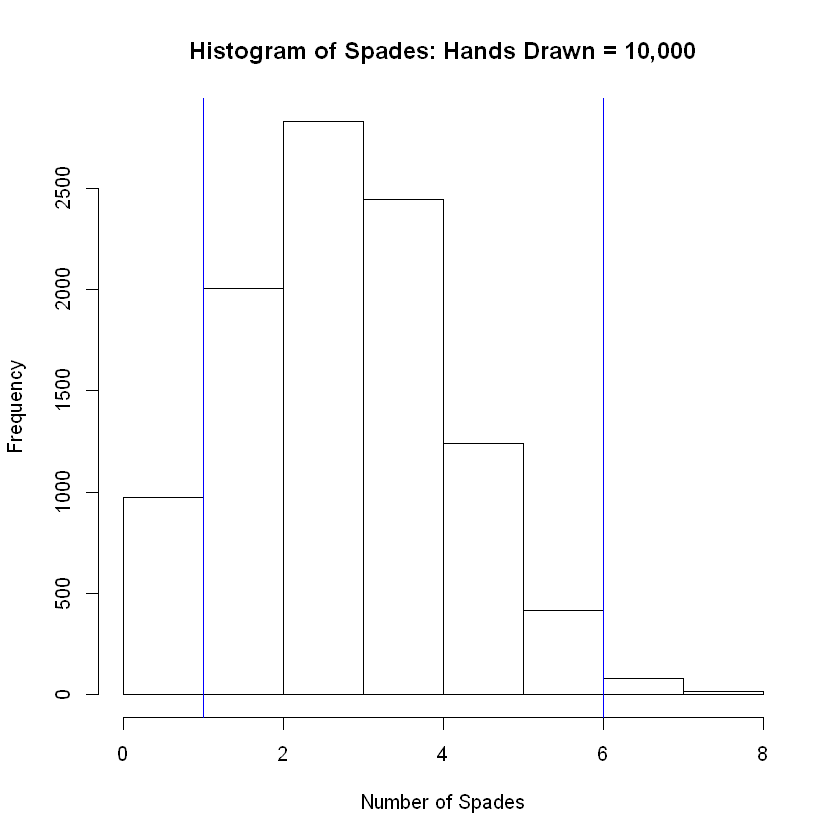

In [7]:
num_success <- c()     # create a vector to store the number of successes for each sample drawn
num_samps = 10000       # set the number of samples to be drawn

for (i in 1:num_samps){
    hand <- sample(deck_df$suits, 13)     # draw 13 cards, count number of Spades
    num_success[i] <- sum( hand  == 'S' )     # count and store the number of Spades from this trial
}

lower <- quantile(num_success, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_success, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the simulated distribution is equal to\n   ',mean(num_success) )
hist(num_success, breaks = 8, main = 'Histogram of Spades: Hands Drawn = 10,000', xlab = 'Number of Spades')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 

The grand mean of the simulated distribution is equal to
    3.25164

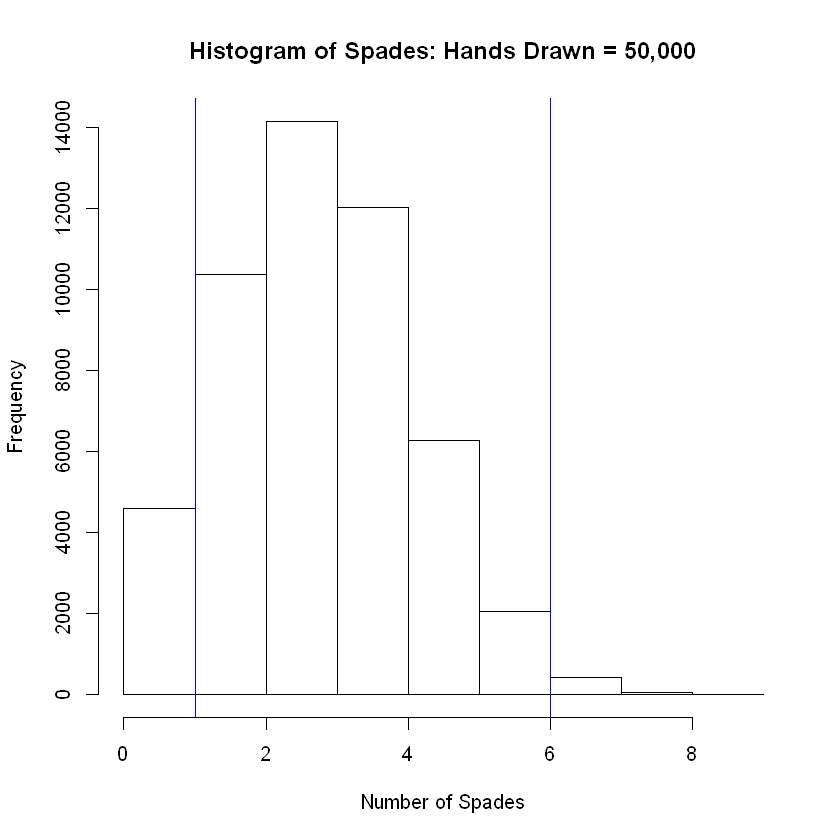

In [8]:
num_success <- c()     # create a vector to store the number of successes for each sample drawn
num_samps = 50000       # set the number of samples to be drawn

for (i in 1:num_samps){
    hand <- sample(deck_df$suits, 13)     # draw 13 cards, count number of Spades
    num_success[i] <- sum( hand  == 'S' )     # count and store the number of Spades from this trial
}

lower <- quantile(num_success, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_success, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the simulated distribution is equal to\n   ',mean(num_success) )
hist(num_success, breaks = 12, main = 'Histogram of Spades: Hands Drawn = 50,000', xlab = 'Number of Spades')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 

The grand mean of the simulated distribution is equal to
    3.25672

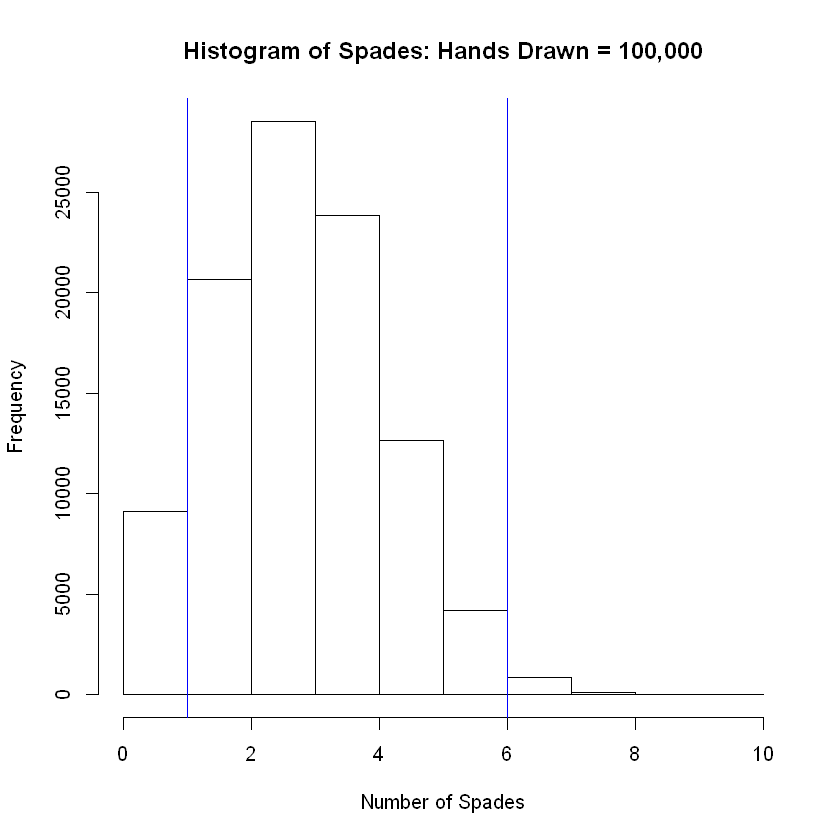

In [9]:
num_success <- c()     # create a vector to store the number of successes for each sample drawn
num_samps = 100000     # set the number of samples to be drawn

for (i in 1:num_samps){
    hand <- sample(deck_df$suits, 13)     # draw 13 cards, count number of Spades
    num_success[i] <- sum( hand  == 'S' )     # count and store the number of Spades from this trial
}

lower <- quantile(num_success, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_success, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the simulated distribution is equal to\n   ',mean(num_success) )
hist(num_success, breaks = 12, main = 'Histogram of Spades: Hands Drawn = 100,000', xlab = 'Number of Spades')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 